# CitiBike 2022 Analysis with Seaborn
This notebook explores CitiBike usage in relation to weather trends using Seaborn for visualization. 
We analyze patterns such as ride frequency vs temperature, user type behavior, and popular start stations.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Load the Merged Dataset
We begin by importing the cleaned and merged dataset that includes CitiBike trip data and LaGuardia weather data.


In [4]:
# Load the merged dataset (adjust if needed)
df = pd.read_csv('citibike_weather_merged_2022.csv')

## Set Global Seaborn Theme
To ensure consistent styling across all plots, we apply a global Seaborn theme. The `whitegrid` style is chosen for clear gridlines, and the `PuRd_r` palette provides a reversed purple-red color scheme.


In [6]:
# Global seaborn theme
sns.set_theme(style="whitegrid", palette="PuRd_r")

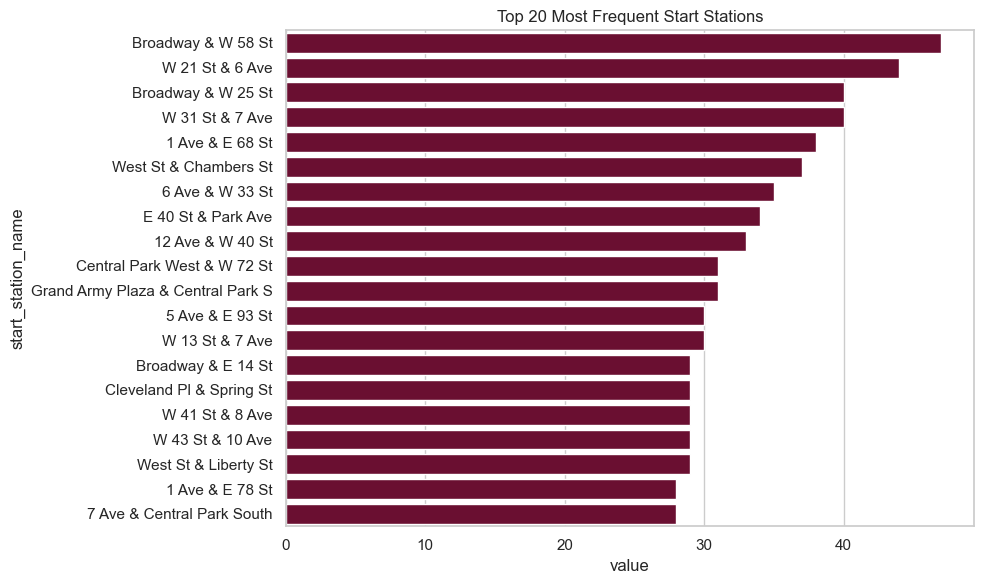

In [7]:
df['value'] = 1
top20 = df.groupby('start_station_name')['value'].count().reset_index().nlargest(20, 'value')

# Temporary palette override
plt.figure(figsize=(10, 6))
with sns.color_palette('PuRd_r', n_colors=20):
    sns.barplot(data=top20, x='value', y='start_station_name')
    plt.title("Top 20 Most Frequent Start Stations")
plt.tight_layout()
plt.show()


📈 **Seasonal Trend: Daily Bike Rides vs Temperature (2022)**

This dual-axis line chart visualizes the relationship between **daily bike ride counts** (blue line, left y-axis) and **average temperature in Fahrenheit** (red line, right y-axis) for the year 2022.

- The **x-axis** represents the **date**, covering the entire year.
- The **left y-axis** shows the number of rides per day, while the **right y-axis** shows the average temperature.
- Warmer temperatures from late spring through early fall (May to September) correspond with a clear rise in bike ridership.
- In colder months, both temperature and ridership drop, highlighting strong seasonality.

This plot effectively illustrates how **weather fluctuations directly impact user behavior**, with ridership peaking during warmer periods.


In [8]:
df.columns


Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'date', 'avg_temp_f_tenths', 'avg_temp_f', 'value'],
      dtype='object')

In [9]:
daily_counts = df.groupby('date').size().reset_index(name='daily_rides')


In [10]:
daily_temp = df[['date', 'avg_temp_f']].drop_duplicates()


In [11]:
merged = pd.merge(daily_counts, daily_temp, on='date')


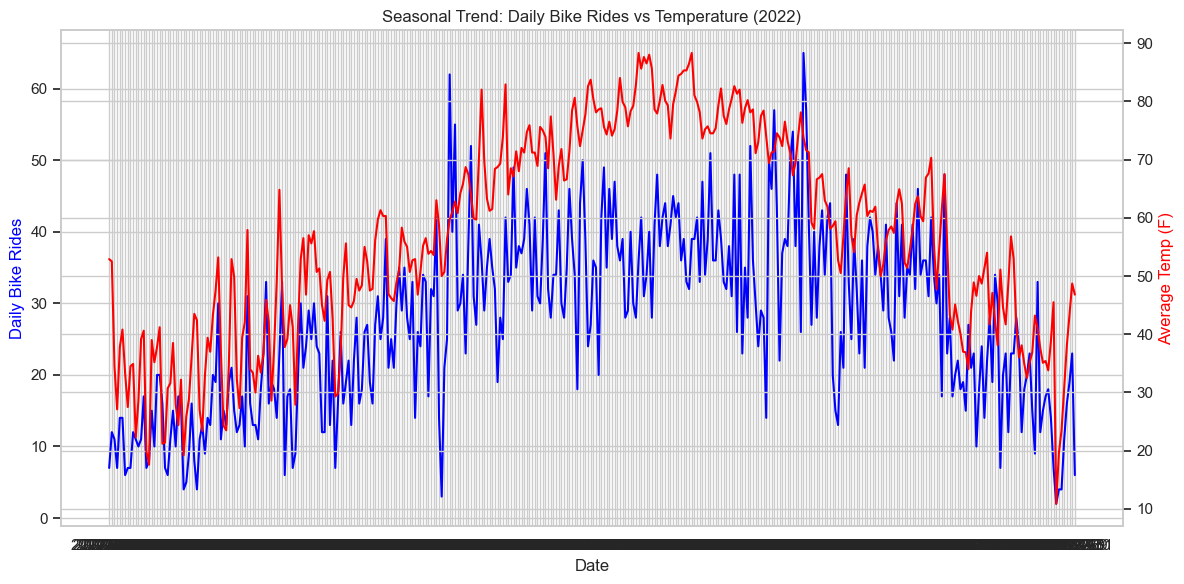

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

fig, ax1 = plt.subplots(figsize=(12, 6))

# Line for bike rides
sns.lineplot(data=merged, x='date', y='daily_rides', ax=ax1, color='blue')
ax1.set_ylabel("Daily Bike Rides", color='blue')
ax1.set_xlabel("Date")

# Second y-axis
ax2 = ax1.twinx()
sns.lineplot(data=merged, x='date', y='avg_temp_f', ax=ax2, color='red')
ax2.set_ylabel("Average Temp (F)", color='red')

plt.title("Seasonal Trend: Daily Bike Rides vs Temperature (2022)")
plt.tight_layout()
plt.show()


### Box Plot Analysis: Average Temperature by User Type

This box plot compares the average temperatures at which rides were taken by members and casual users. Both user types show similar distributions, with casual riders having a slightly higher median temperature than members. This suggests that **casual users tend to ride more often during warmer weather**, possibly for leisure, while **members ride more consistently across a range of temperatures**, likely for commuting purposes. The presence of outliers on both sides indicates that some users ride in unusually cold or hot conditions. Overall, the box plot highlights behavioral differences in ride patterns between user groups based on temperature.


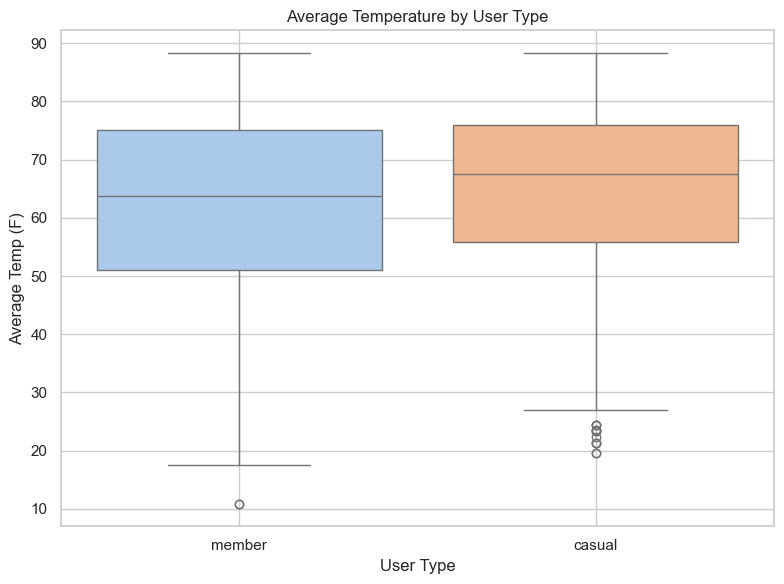

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# Suppress FutureWarnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Create the box plot without triggering the warning
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='member_casual', y='avg_temp_f', hue='member_casual',
            palette='pastel', legend=False)

# Add labels and styling
plt.title('Average Temperature by User Type')
plt.xlabel('User Type')
plt.ylabel('Average Temp (F)')
plt.grid(True)
plt.tight_layout()
plt.show()



## 📊 Monthly Ride Frequency by User Type (FacetGrid Chart)
This visualization uses Seaborn's FacetGrid to compare the monthly ride frequency for member and casual users in 2022.
Each facet (subplot) represents a different user type.
Rides peak during the warmer months (June to September) for both user groups, especially in July and August.
Members consistently take more rides throughout the year, while casual users show a sharper seasonal pattern with low activity in the winter months.
The color palette coolwarm helps visually represent seasonal trends from cooler to warmer months.
This chart is effective for highlighting usage differences between membership types and how both respond to seasonal changes. 🚴‍♀️☀️❄️

In [15]:
df['month'] = pd.to_datetime(df['date']).dt.month_name()


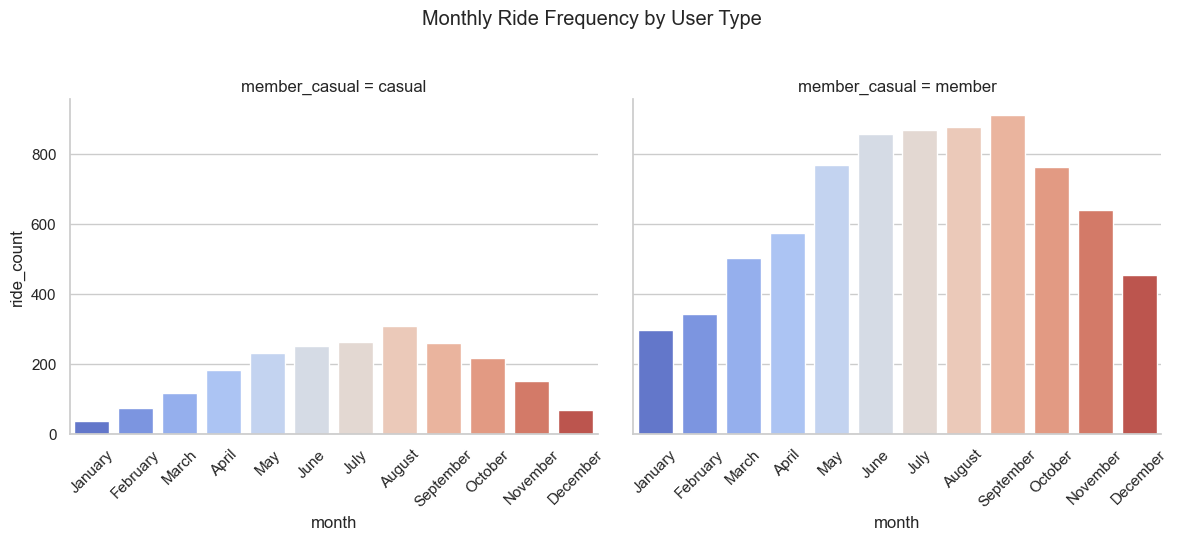

In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)

# Convert date column to full month names (optional: keep order)
df['month'] = pd.to_datetime(df['date']).dt.month_name()
df['month_num'] = pd.to_datetime(df['date']).dt.month  # For sorting

# Group by user type and month, count rides
monthly_counts = df.groupby(['member_casual', 'month', 'month_num']).size().reset_index(name='ride_count')

# Sort months in calendar order
monthly_counts = monthly_counts.sort_values('month_num')

# Plot using FacetGrid with coolwarm palette
g = sns.FacetGrid(data=monthly_counts, col='member_casual', height=5, aspect=1.2)
g.map_dataframe(sns.barplot, x='month', y='ride_count', hue='month', palette='coolwarm', legend=False)

# Rotate labels
for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(45)

# Final formatting
plt.subplots_adjust(top=0.8)
g.fig.suptitle("Monthly Ride Frequency by User Type")
plt.show()

